# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

/Users/kevinfranklin/anaconda2/envs/py27/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [6]:
#function
admit_summary = df_raw.admit.describe()
gre_summary = df_raw.gre.describe()
gpa_summary = df_raw.gpa.describe()
prestige_summary = df_raw.prestige.describe()

In [10]:
print admit_summary
print gre_summary
print gpa_summary
print prestige_summary

count    400.000000
mean       0.317500
std        0.466087
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: admit, dtype: float64
count    398.000000
mean     588.040201
std      115.628513
min      220.000000
25%      520.000000
50%      580.000000
75%      660.000000
max      800.000000
Name: gre, dtype: float64
count    398.00000
mean       3.39093
std        0.38063
min        2.26000
25%        3.13000
50%        3.39500
75%        3.67000
max        4.00000
Name: gpa, dtype: float64
count    399.000000
mean       2.486216
std        0.945333
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: prestige, dtype: float64


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The GRE has higher values (up to 800 vs 4.0 for GPA). A higher STD doesn't necessarily imply that it is more volatile, it is proportional to the values of the feature.


#### Question 4. Drop data points with missing data


In [12]:
df_no_na = df_raw.dropna()
df_no_na.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: There are now 397 for every value

#### Question 6. Create box plots for GRE and GPA

In [28]:
import seaborn as sns

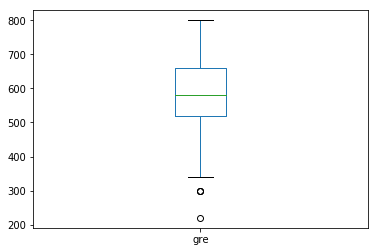

In [30]:
#boxplot 1
df_no_na.gre.plot.box()

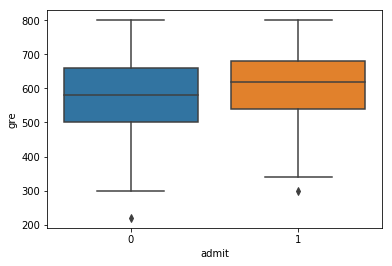

In [31]:
sns.boxplot(x="admit", y="gre", data=df_no_na)

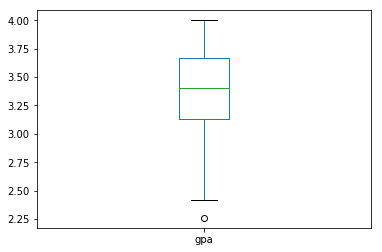

In [32]:
#boxplot 2 
df_no_na.gpa.plot.box()

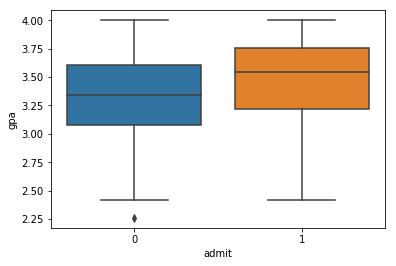

In [33]:
sns.boxplot(x="admit", y="gpa", data=df_no_na)

#### Question 7. What do these plots show?

Answer: These plots show that both variables have some outliers on the lower end.
The side by side comparisons show that those who are admitted tend to have a higher GPA and GRE value.

#### Question 8. Describe each distribution 

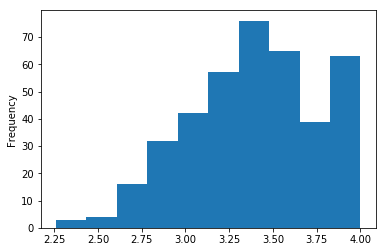

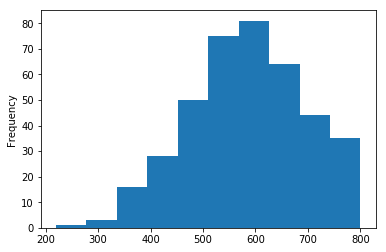

In [46]:
# plot the distribution of each variable 
df_no_na.gpa.plot.hist()
plt.show()

df_no_na.gre.plot.hist()
plt.show()

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: For GRE it is approximately normal but GPA is fairly skewed towards 4.0 values.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: GPA could potentially use some as the max is 4.0

#### Question 11. Which of our variables are potentially colinear? 

GRE and GPA would be a logical correlation

In [49]:
df_no_na.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


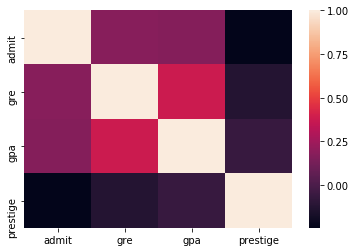

In [52]:
# create a correlation matrix for the data
sns.heatmap(df_no_na.corr())


#### Question 12. What did you find?

Answer: GRE and GPA have a correlation with each other.
By themselves, each feature seems to have some correlation with admit, but alone none of them are extremely strong.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 
Remove any null values in the dataset
Plot the data to see if there are visible differences in values between those admitted and those not
Identify the correlation coefficient
Build a regression model and analyze the against a test set

#### Question 14. What is your hypothesis? 

Answer: 
I would hypothesize that the lower the prestige (ie: rank) of a school, the better the odds of a student being admitted.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data